#  Проект "Исследование надежности заемщиков"

#### Описание проекта
Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## 1. Открываем таблицу и изучаем общую информацию о данных

**Импортируем библиотеку pandas. Считаем данные из csv-файла в датафрейм и сохраняем в переменную `data`.**

In [8]:
import pandas as pd
data = pd.read_csv('Downloads/data.csv')

**Выводим первые 20 строчек датафрейма `data` на экран**

In [12]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Выводим основную информацию о датафрейме с помощью метода `info()**

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## 2. Предобработка данных

### 2.1. Удаление пропусков

**Выводим количество пропущенных значений для каждого столбца, используя комбинацию двух методов isna, sum**

In [14]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце обработаем на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом**

In [15]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### 2.2. Обработка аномальных значений

**В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработаем значения в этом столбце: заменим все отрицательные значения положительными с помощью метода `abs()`**

In [16]:
data['days_employed'] = data['days_employed'].abs()

**Для каждого типа занятости выведем медианное значение трудового стажа `days_employed` в днях**

In [17]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть.

**Выведем перечень уникальных значений столбца `children`**

In [18]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

**В столбце `children` есть два аномальных значения. Удалим строки, в которых встречаются такие аномальные значения из датафрейма `data`**

In [20]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Ещё раз выведем перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены**

In [21]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### 2.3. Удаление пропусков (продолжение)

**Заполняем пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [23]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

Убедимся, что все пропуски заполнены. Ещё раз выведем количество пропущенных значений для каждого столбца.**

In [24]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### 2.4. Изменение типов данных

**Заменим вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [25]:
data['total_income'] = data['total_income'].astype(int)

### 2.5. Обработка дубликатов

**Обработаем неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведем их к нижнему регистру.**

In [26]:
data['education'] = data['education'].str.lower()

**Выведем на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалим их.**

In [27]:
data.duplicated().sum()

71

In [28]:
data = data.drop_duplicates()

### 2.6. Категоризация данных

** На основании диапазонов, указанных ниже, создадим в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используем собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [29]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [30]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Выведем на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [31]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используем собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучим данные в столбце `purpose` и определим, какие подстроки помогут правильно определить категорию.**

In [32]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [33]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## 3 Определение зависимостей

### 3.1. Определим существует ли зависимость между количеством детей и возвратом кредита в срок

Для начала группируем данные по кол-ву детей, а в значениях выводим долги.
Далее путем метода 'agg' считаем суммрное кол-во людей, бравших кредит 'sum', также кол-во должников -'count' и долю должников среди кредиторов - 'mean'

In [35]:
debt_children = data.groupby('children')['debt'].agg(['count','sum','mean'])
debt_children

,count,sum,mean
children,,,
0,14091,1063,0.075438
1,4808,444,0.092346
2,2052,194,0.094542
3,330,27,0.081818
4,41,4,0.097561
5,9,0,0.000000


Далее для наглядности и простоты чтения таблицы сортируемся по убыванию столбца 'mean', а также задаем формат для столбцов 'Доля кредиторов' и 'mean' в виде процентов. Также решил сменить названия столбцов, опять же, чтобы таблица имела более наглядный и читабельный вид.

In [36]:
debt_children = debt_children.sort_values('mean',ascending=False)
debt_children['mean'] = debt_children['mean'].apply('{:.2%}'.format)
debt_children = debt_children.rename(columns={'count':'Кол-во кредиторов', 'sum':'Кол-во должников', 'mean':'Доля должников'})
debt_children


,Кол-во кредиторов,Кол-во должников,Доля должников
children,,,
4,41,4,9.76%
2,2052,194,9.45%
1,4808,444,9.23%
3,330,27,8.18%
0,14091,1063,7.54%
5,9,0,0.00%


**Вывод:** 
Исходя из полученной таблицы, можно сделать выводы, что кол-во детей влияет на закрытие кредита в срок.

Наибольший показатель просроченного кредита имеют семьи с 1-2 детьми, в то время как наименьший показатель у семей без детей (Однако интересный факт, что семьи без детей берут намного чаще кредит, почти в два раза!).

Также стоит отметить, что кол-во кредитов у семей с 3, 4, 5-ю детьми слишком мало (менее 2%), что, на мой взгляд, статистически не значимо. 

Одними из возможных причин менее низкого показателя просроченного кредита у бездетных семей являются стабильное движение потока денежных средств и меньшие затраты на жизнь.

### 3.2. Определяем есть ли зависимость между семейным положением и возвратом кредита в срок

Формируем такую же таблицу как и в таблице зависимости возврата кредита в срок и кол-ве детей. В данной табице группируем данные по семейному пооложению, а в значениях выводим долги.

In [37]:
debt_family = data.groupby('family_status')['debt'].agg(['count','sum','mean'])
debt_family

,count,sum,mean
family_status,,,
Не женат / не замужем,2796,273,0.097639
в разводе,1189,84,0.070648
вдовец / вдова,951,63,0.066246
гражданский брак,4134,385,0.093130
женат / замужем,12261,927,0.075606


Далее для наглядности и простоты анализа вносим изменения в названия и формат столбцов.

In [38]:
debt_family = debt_family.sort_values('mean',ascending=False)
debt_family['mean'] = debt_family['mean'].apply('{:0.2%}'.format)
debt_family = debt_family.rename(columns={'count':'Кол-во кредиторов','sum':'Кол-во должников','mean':'Доля должников'})
debt_family

,Кол-во кредиторов,Кол-во должников,Доля должников
family_status,,,
Не женат / не замужем,2796,273,9.76%
гражданский брак,4134,385,9.31%
женат / замужем,12261,927,7.56%
в разводе,1189,84,7.06%
вдовец / вдова,951,63,6.62%


**Вывод:** 
Честно сказать, я удивлен результатом зависимости. Люди из категории 'Не женат / не замужем' имеют наивысший процент должников, в то время как люди, которые когда либо создавали семью имеют меньше всего задолжностей. Что значит, зависимость между семейным положением и возвратом кредита в срок есть.

На мой взгляд, люди, которые когда либо имели семью более грамотно подходят к распределению финансов, что объясняется опытом в распределнии бюджета и отвественностью перед близкими людьми. В то время, как одинокие люди могут более свободно обращаться со своими финансами и несут отвественность только за себя, также стоит отметить, что люди из категории 'Не женат/не замужем' это по большей части молодые люди, которые на данный момент только приступили к рабочей деятельности, имеют не высокую заработную плату и не опытны в распределении своих финансов.

Однако одна группа, меня смущает, это - 'гражданский брак'. В этой категории довольно высокий процент задолженности, что противоречит выводу об ответственности перед семьей. Погрузившись в тему гражданского брака (просмотрев статьи в интернете), обнаружил, что люди в данном положении: "Не ощущают прочности данного положения, серьезности отношений", что значит люди менее отвественны перед друг другом и свободно обращаются со своими финансами в отличии от истинного брака. 

### 3.3. Определяем зависимость между уровнем дохода и возвратом кредита в срок

Формируем таблицу с такими же столбцами, как и в предыдущих таблицах зависимостей, однако здесь группируем данные по столбцу, сформированную по функции 'categorize_income' 

In [41]:
debt_income = data.groupby('total_income_category')['debt'].agg(['count','sum','mean'])
debt_income

,count,sum,mean
total_income_category,,,
A,25,2,0.080000
B,5014,354,0.070602
C,15921,1353,0.084982
D,349,21,0.060172
E,22,2,0.090909


Корректируем форматы и меняем названия столбцов для простоты и наглядности таблицы. Также добавляем подпись в виде расшифровки категории)

In [42]:
debt_income = debt_income.sort_values('mean',ascending=False)
debt_income['mean'] = debt_income['mean'].apply('{:0.2%}'.format)
debt_income = debt_income.rename(columns={'count':'Кол-во кредиторов','sum':'Кол-во должников','mean':'Доля должников'})

print(debt_income,'''

Обозначения категорий
0–30000 — E 
30001–50000 — D 
50001–200000 — C 
200001–1000000 — B 
1000001 и выше — A''')

                       Кол-во кредиторов  Кол-во должников Доля должников
total_income_category                                                    
E                                     22                 2          9.09%
C                                  15921              1353          8.50%
A                                     25                 2          8.00%
B                                   5014               354          7.06%
D                                    349                21          6.02% 

Обозначения категорий
0–30000 — E 
30001–50000 — D 
50001–200000 — C 
200001–1000000 — B 
1000001 и выше — A


**Вывод:** 
Исходя из итоговой таблицы, я пришел к неоднозначному выводу.

Наибольший процент должников у группы E, однако людей, взявших кредит у группы A и E настолько мало, что их нельзя счиатать статистичиски значимым, так как их количество колоссально маленькое по сравнению с другими категориями. Возможно это связано с тем, что люди с низким доходом, попросту не смогут покрыть кредит и принимают решение не брать его вовсе, в то время как, люди с наивысшим доходом попросту не нуждаются в заеме денежных средств. Группа D тоже, на мой взгляд слишком мала, чтобы включать её в выборку.

Однако, если рассматривать другие категории, то можно сделать вывод, что с ростом дохода уменьшается доля должников. Стоит отметить, что уменьшается, как доля должников, так и кол-во людей, взявших в кредит в целом. 
Возможно у группы людей B, что близка к наивысшему доходу, более крупные суммы свободных денег, которые и идут на покрытие кредита.

### 3.4 Как разные цели кредита влияют на его возврат в срок?

Формируем таблицу с такими же столбцами, как и в предыдущих таблицах зависимостей, однако здесь группируем данные по столбцу, сформированную по функции 'categorize_purpose'

In [43]:
debt_purpose = data.groupby('purpose_category')['debt'].agg(['count','sum','mean'])
debt_purpose

,count,sum,mean
purpose_category,,,
операции с автомобилем,4279,400,0.093480
операции с недвижимостью,10751,780,0.072551
получение образования,3988,369,0.092528
проведение свадьбы,2313,183,0.079118


Корректируем форматы и меняем названия столбцов для простоты и наглядности таблицы.

In [44]:
debt_purpose = debt_purpose.sort_values('mean',ascending=False)
debt_purpose['mean'] = debt_purpose['mean'].apply('{:0.2%}'.format)
debt_purpose = debt_purpose.rename(columns={'count':'Кол-во кредиторов','sum':'Кол-во должников','mean':'Доля должников'})
debt_purpose

,Кол-во кредиторов,Кол-во должников,Доля должников
purpose_category,,,
операции с автомобилем,4279,400,9.35%
получение образования,3988,369,9.25%
проведение свадьбы,2313,183,7.91%
операции с недвижимостью,10751,780,7.26%


**Вывод:** 
Самые низкие показатели должников по кредитам являются группы: 'проведение свадьбы '/'операции с недвижимостью'.
Безусловно люди, которые проводят свадьбу, имеют малые задолженности, так как в честь праздника, обычно подарком являются деньги для новоиспеченной семьи, что покрывает кредит самой свадьбы. 

Далее одним из возможных вариантов движения подарочных свадебных денег будет покупка квартиры или первоначальный взнос, что уменьшает сумму кредита. Также низким процентом задолженности по операциям с недвижимостью может быть высокий доход кредитора, так как квартиры покупают обычно уже состоятельные люди) 

### 3.5 Возможные причины появления пропусков в исходных данных.

**Ответ:**
Возможными причинами в появлении пропусков в исходных данных могут быть:

1) ошибки при вводе данных

2) ошибки системы (банальные сбои)

3) неправильный формат данных

4) сокрытие информации.


На примере данных этого проекта, нашел ошибки:


1) Неправильно заполнение уровня доходов (Пример: 100.000, 100 000, 100 000,00, 100 000р)

2) Отстутвие данных или сокрытие, в случае с пенсионером с индексом 12 это пропуск в 'total_income' и 'days_employed' (Однако при выводе 30 строк исходных данных, рассматривая данного  пенсионера, появляются данные о доходе и кол-ве дней, если кол-во дней я понимаю, что некорректные данные - 932 года, врядли столько кто-то проработает, то столбец доход уже вызывает вопросы).


3.6 Причины заполния пропусков медианным значением для количественных переменных.

**Ответ:** Заполнять пропуски медианным значением для количественных переменных является лучшим решением, так как в выборке могут быть аномальные данные.

Рассмотрим пример: 
Необходимо вычислить ср. рост в 6 "Б" классе. Допустим, у нас малое количество учеников в классе (школа в деревне) и состоит из 7 человек.
Рост семи человек: 150, 152, 155, 160, 154, 190(второгодка), 152.

Арифм. ср. в данном случае будет - 159 (почти 160 см!, хотя в классе всего 2 из 7 достигли этой отметки)

Медианное значение - 154 (уже больше похоже на правду).

В данном примере разница в 5 сантиметров, однако если брать примеры с заработными платами, где разброс может быть еще больше так как оплата группы специалистов и 1-2 руководящих должностей сильно разнятся, среднее значение будет некорректным.

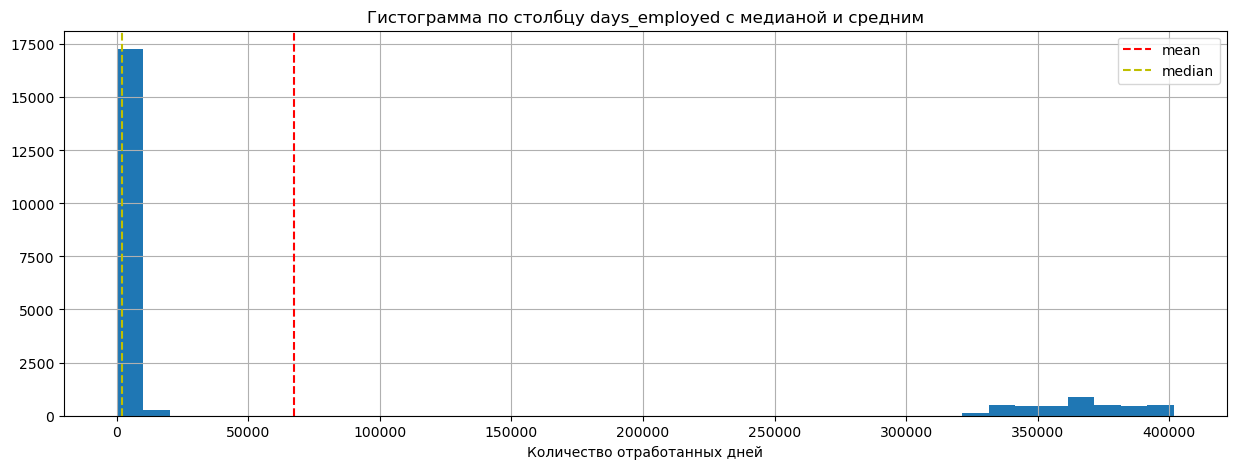

In [46]:
    import matplotlib.pyplot as plt

    plt.figure(figsize = (15,5))

    ax = data['days_employed'].hist(bins = 40)

    ax.axvline(x = data['days_employed'].mean(), color = 'r', linestyle = 'dashed', label = 'mean')
    ax.axvline(x = data['days_employed'].median(), color = 'y', linestyle = 'dashed', label = 'median')
    plt.legend()
    plt.title('Гистограмма по столбцу days_employed с медианой и средним')
    plt.xlabel('Количество отработанных дней')
    plt.show()

### 4. Общий вывод.

Подводя итог, получив входные данные о статистике платёжеспособности клиентов, столкнулся с некоторыми трудностями в проведении исследования. В первую очередь, стоит обратить внимание на пропуски в таких столбцах как 'total_income', 'days_employed'. Отсутсвие данных не позволяет качественно оценить зависимости, что в полседствии может привести к некорректной работе кредитного скоринга, в данном случае заполнил пропуски медианным значением. В исходных данных также есть дубликаты, что затягивает процесс исследования. Особое внимание стоит уделить категоризации данных, в нашем случае столбцы 'purpose' и 'total_income' имеют огромное кол-во схожих значений, что усложняет и увеличивает процесс обработки данных, разбив данные на категории изначально, это ускорило бы работу. Также в статистике платёжеспособности клиентов есть аномальные данные в столбце 'days_employed', что опять же может привести к некорректному рез-ту.


В ходе работы, проверили две гипотезы: 

1) Зависит ли семейное положение на факт погашения кредита в срок.

Первая гипотеза полностью подтвердилась, люди имеющие когда либо семью, как правило закрывают кредит в срок.

2) Влияет ли количество детей на факт погашения кредита в срок.

Вторая гипотеза также подтвердилась, люди имеющие 2-детей реже закрыват кредиты без задолжностей, чем люди имеющие 1 ребенка в семье. В то же время, разница между людьми не имеющими детей и имеющими 1 ребенка - 1,69%, людей не обладающими детьми меньше.


В ходе проекта, мне удалось выяснить, что уровень дохода неоднозначно влияет на погашение кредита в срок, так как людей с наименьшим доходом и нивысшим попросту мало, что скорее всего объясняется их возможностями по кредиту. Однако если рассматривать людей со средним доходом и выше среднего, то здесь явно наблюдается тенденция закрытия кредита в срок с увеличением прибыли.

Также, в зависимости целей кредита и закрытия его в срок, наблюдаются явные фавориты и аутсайдеры. Доля людей, просрочивших кредит на свадьбу и недвижимость, меньше чем кредиторов по покупке авто и образования.


В дальнешем при вводе данных о целях и доходах, рекоммендую использовать список, чтобы кредитор мог остановить свой выбор на определенной категории, что сильно ускорило бы работу специалистов по обработке данных и упрощало бы вывод результатов. При оценке возможности клиента вернуть кредит банку в срок, в первую очередь стоит обращать внимание на цели кредита и семейное положение, так как здесь прослеживаются наиболиче явные тенденции. Целями наиболее рискованных кредитов являются: операции с автомобилем и получение образования, в то же самое время доля клиентов с не уплатой в срок кредитов на свадьбу и недвижимость меньше. Что касается семейного положения, люди состоящие в гражданском браке или вовсе не имеющие семью более склоны к задолженности по кредиту, чем лица, состоящие когда - либо в браке. Далее стоит учитывать кол-во детей в семье, здесь можно проследить зависимость: Чем меньше детей, тем меньше доля должников по кредиту.